In [10]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ase.io import write, read

# Load a sample result

In [2]:
traj_path = 'pathways/187_-0.193576_4.094021_1.759902_full.traj'
data_path = 'pathways/187_-0.193576_4.094021_1.759902.npz'

In [3]:
'''
Make frame thicker, make tick pointing inside, make tick thicker
default frame width is 2, default tick width is 1.5
'''
def frame_tick(frame_width = 2, tick_width = 1.5):
    ax = plt.gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(frame_width)
    plt.tick_params(direction = 'in', 
                    width = tick_width)

'''
legend:
default location : upper left
default fontsize: 8
Frame is always off
'''
def legend(location = 'upper left', fontsize = 8):
    plt.legend(loc = location, fontsize = fontsize, frameon = False)
    
'''
savefig:
bbox_inches is always tight
'''
def savefig(filename):
    plt.savefig(filename, bbox_inches = 'tight')

# Plot the reconstruction pathway

Initial Energy: 4.094021eV
Transition State Energy: 1.759902eV
New Minimum Energy: -0.193576eV


Text(0.5, 1.0, 'DRL')

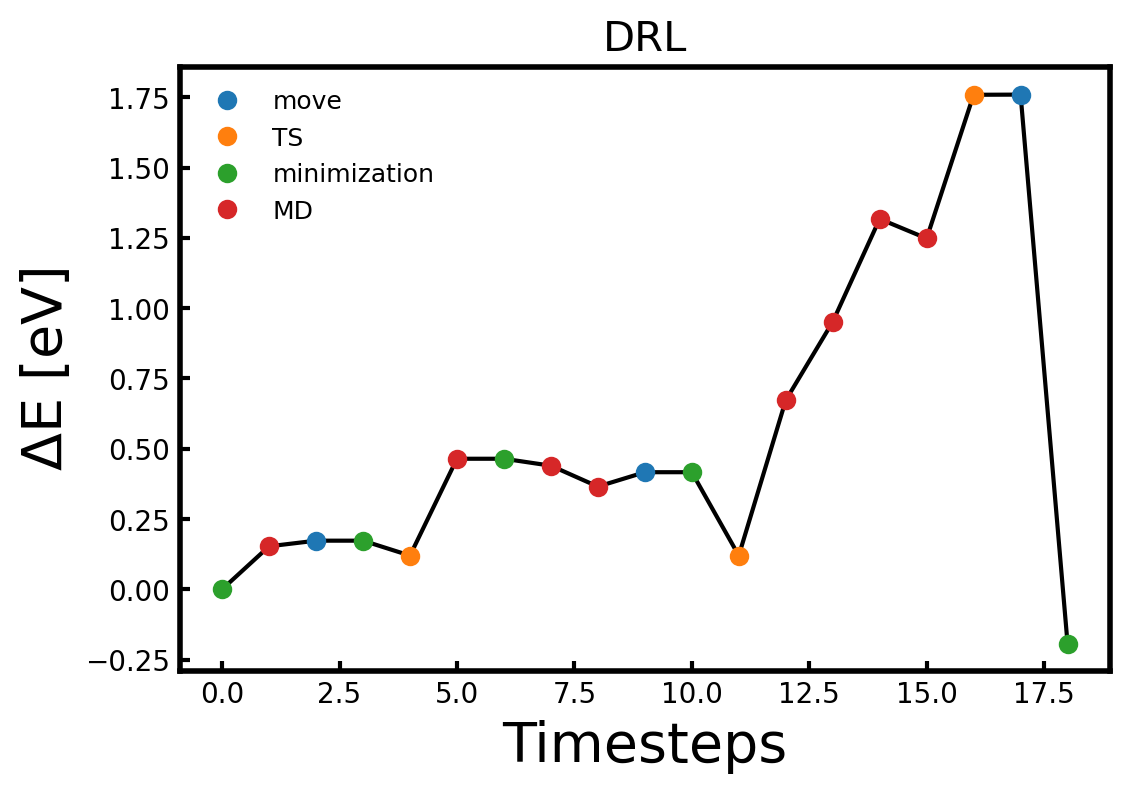

In [5]:
ACTION_LOOKUP = [
    'move',
    'TS',
    'minimization',
    'MD',
]

data = np.load(data_path) 
actions = data['actions']
energies = data['energies']
print('Initial Energy: %feV'%data['initial_energy'])
print('Transition State Energy: %feV'% max(energies))
print('New Minimum Energy: %feV'%energies[-1])

figure = plt.figure(figsize = [6, 4], dpi = 200)
ax = plt.gca()
ax.plot(np.arange(len(data['energies'])), data['energies'], color='k')

for action_index in range(len(ACTION_LOOKUP)):
        action_time = np.where(actions==action_index)[0]
        ax.plot(action_time, energies[action_time], 'o', 
                label=ACTION_LOOKUP[action_index])

frame_tick()
legend(fontsize = 9)
plt.ylabel('$\Delta$E [eV]', fontsize=20)
plt.xlabel('Timesteps', fontsize=20)
plt.title("DRL", fontsize=15)
# plt.savefig('paper/pathways/%f_path.png' %energies[-1], bbox_inches='tight')

# Plot the Average Rewards

In [8]:
idx = np.arange(10,110,10)
window = 50
stop = 15000
avg = np.zeros((stop-window,1))
std = np.zeros((stop-window,1))
count = 0
for i in idx:
    if i != 90: # short step
        f = ('rewards/rewards_%d.txt' %i)
        with open(f) as file:
            rewards = json.load(file)

        df = pd.DataFrame(rewards)
        sma = df.rolling(window, win_type=None).mean().iloc[window:stop].to_numpy()
        sma_std = df.rolling(window, win_type=None).std().iloc[window:stop].to_numpy()
        avg += sma
        std += sma_std
        count += 1
avg /= count
std /= count

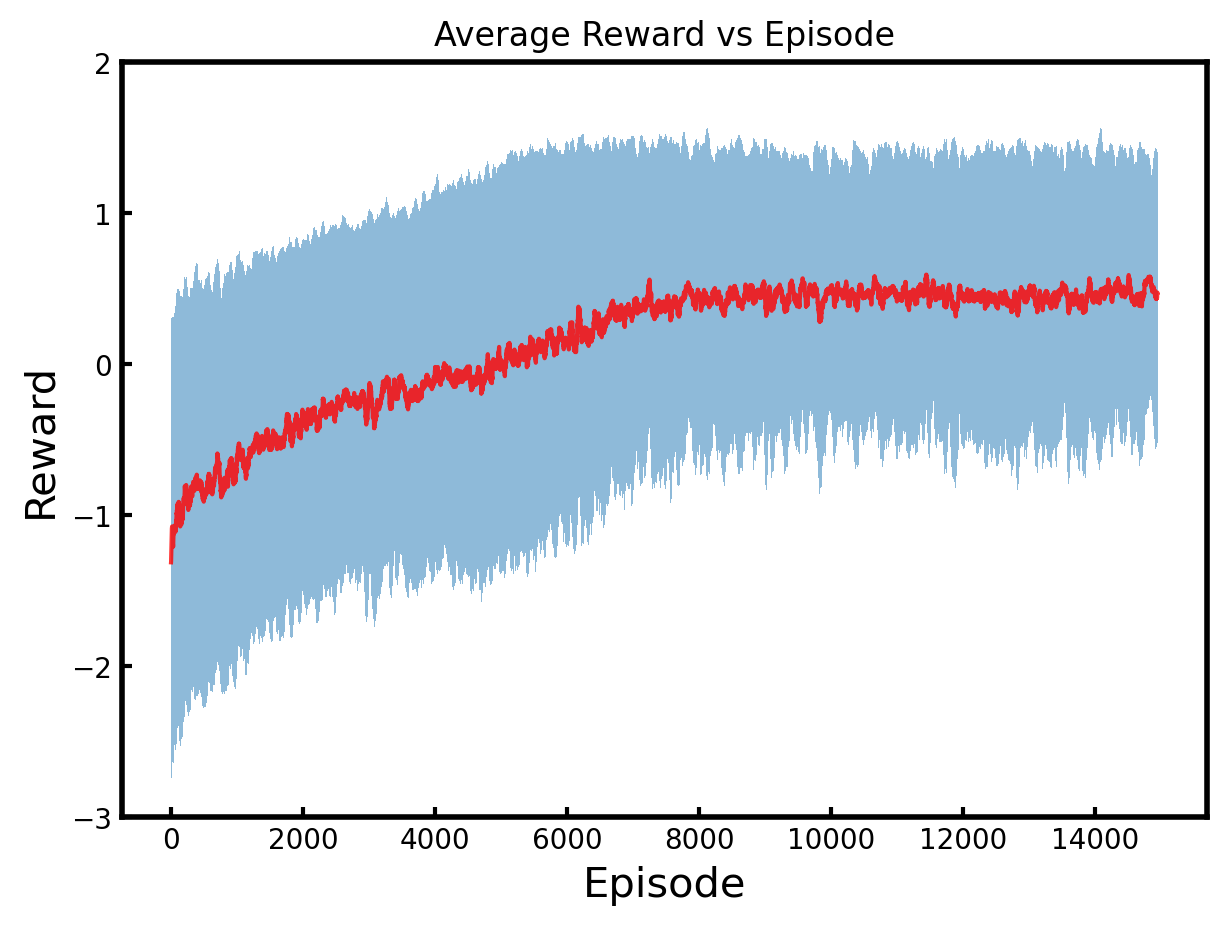

In [9]:
figure = plt.figure(figsize = [7, 5], dpi = 200)
ax = plt.gca()

ax.plot(np.arange(len(avg)), avg, alpha = 0.8, color = 'r')
ax.fill_between(np.arange(len(avg)), 
                 (avg-std).reshape(-1), 
                 (avg+std).reshape(-1),
                 alpha=0.5,
                 antialiased=False,
        )        

frame_tick()
plt.xlabel('Episode', fontsize=15)
plt.ylabel('Reward', fontsize=15)
plt.ylim(-3,2)
plt.title('Average Reward vs Episode')
# plt.savefig('paper/rewards.png', bbox_inches = 'tight')
plt.show()